### Dataset Description

##### The dataset is related to credit risk prediction and contains information about individuals’ financial behavior and loan repayment patterns. Key points:

##### Target Variable:
##### SeriousDlqin2yrs (Binary: 1 = default within 2 years, 0 = no default).

### Key Features (used in project):
1. Age_group – Grouped age of individuals.
2. Debt_per_Dependent – Debt ratio per dependent.
3. Debt_per_Loan – Average debt taken per loan.
4. Income_x_DebtRatio – Interaction feature of monthly income and debt ratio.
5. LatePayment_total – Total late payment history.

### Original Dataset Size:
1. 22 columns (financial + demographic + payment history).
2. Several missing values in income, dependents, and categorical features.

### Data Processing Applied:
1. Missing values handled (mean/median for numeric, mode/grouping for categorical).
2. Outliers treated with capping (99th percentile).
3. Normalization & standard scaling for continuous variables.
4. Feature engineering to create new meaningful columns.
5. Class imbalance handled (SMOTE/oversampling) due to fewer defaults.

### Problem Statement

##### The main goal of this project is to:
1. Predict credit default risk of an individual within 2 years (SeriousDlqin2yrs).
2. Build machine learning models to identify high-risk customers for banks/financial institutions.
3. Help lenders reduce financial losses by detecting potential defaulters early.
4. Compare performance of Logistic Regression and Decision Tree before and after hyperparameter tuning.

##### Achieve a balance between accuracy and interpretability, ensuring the model is useful in real-world credit risk assessment.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the Dataset

In [53]:
df = pd.read_csv('cs-training.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [55]:
pd.read_csv('SampleEntry.csv').head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


### About the Data

In [56]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(150000, 12)
Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio              

### Handling Missing Value
#### Missing Value Treatment

##### 1.Handled missing values:
##### 2.Imputed mean/median for continuous variables.
##### 3.Imputed mode for categorical variables.
##### 4.Columns with too many missing values were treated carefully

In [57]:
# Handling Misssing value
df.isnull().sum()

# filling Monthly Missing value with median value
df.fillna({'MonthlyIncome': df['MonthlyIncome'].mean()}, inplace=True)

# filling No.of Dependence with 0
df.fillna({'NumberOfDependents' : 0}, inplace = True)

df.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [58]:
df['age'].skew()

np.float64(0.18899454512676198)

## Data Cleaning And Data processing
### Outlier Detection & Handling
##### used boxplots and quantile method to detect outliers (especially in MonthlyIncome, DebtRatio, and ---late payment counts).
##### Applied capping method:
##### Upper cap = 99th percentile
##### Lower cap = 1st percentile
##### Replaced extreme values with caps using np.where().

### Skewness Check & Transformation 
##### Calculated skewness of continuous variables.
##### Applied transformations on highly skewed features:
##### Log transformation (e.g., MonthlyIncome).
##### Square root transformation (e.g., DebtRatio).
##### This reduced skewness and brought distributions closer to normal.



In [59]:
# Handling of outliers in Monthlys income and Debt ratio
df["MonthlyIncome"].describe()
upper_cap = df['MonthlyIncome'].quantile(0.99)  # top 1% income
lower_cap = df['MonthlyIncome'].quantile(0.01)  # bottom 1%

df['MonthlyIncome'] = np.where(df['MonthlyIncome'] > upper_cap, upper_cap,
                        np.where(df['MonthlyIncome'] < lower_cap, lower_cap, df['MonthlyIncome']))

df['MonthlyIncome_log'] = np.log1p(df['MonthlyIncome'])
df['MonthlyIncome_sqrt'] = np.sqrt(df['MonthlyIncome'])



In [60]:
print(df['MonthlyIncome'].skew())
print(df['MonthlyIncome_log'].skew())
print(df['MonthlyIncome_sqrt'].skew())



1.5703435462456883
-5.074795547999634
0.014047177313490046


In [61]:
df.drop('MonthlyIncome_log', axis=1, inplace=True)


In [62]:
# Removing outliers in DebtRatio
df['DebtRatio'].describe()
upper_cap = df['DebtRatio'].quantile(0.99)
lower_cap = df['DebtRatio'].quantile(0.01)
df['DebtRatio'] = np.where(df['DebtRatio'] > upper_cap, upper_cap,
                        np.where(df['DebtRatio'] < lower_cap, lower_cap, df['DebtRatio']))



In [63]:
df['DebtRatio'].skew()
df['DebtRatioLT'] = np.log1p(df['DebtRatio'])
df['DebtRatioSq'] = np.sqrt(df['DebtRatio'])
df['DebtRatioSq'].skew()

np.float64(2.417311565860662)

<Axes: ylabel='Frequency'>

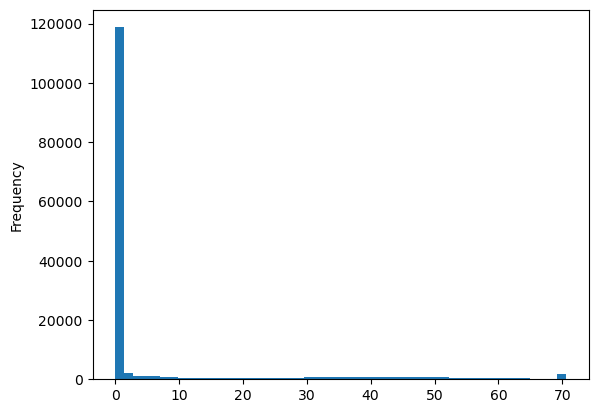

In [64]:
df['DebtRatioSq'].plot(kind = 'hist', bins = 50)

In [65]:
upper_cap = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.99)
lower_cap = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.1)    
df['ReUnseuredLines'] = np.where (df['RevolvingUtilizationOfUnsecuredLines']> upper_cap,upper_cap,
                                 np.where(df['RevolvingUtilizationOfUnsecuredLines']< lower_cap,lower_cap,df['RevolvingUtilizationOfUnsecuredLines']))
df['logReUnseuredLines'] = np.log1p(df['ReUnseuredLines'] )

In [66]:
df['logReUnseuredLines'].mean(),df['logReUnseuredLines'].std(),df['logReUnseuredLines'].skew()

(np.float64(0.24615506214480012),
 0.2467356801537063,
 np.float64(0.7163420146944748))

In [67]:
upper_cap = df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.99)
lower_cap = df['NumberOfTime30-59DaysPastDueNotWorse'].quantile(0.1)    
df['RangeNo.OfTime30-59DaysPastDueNotWorse'] = np.where (df['NumberOfTime30-59DaysPastDueNotWorse']> upper_cap,upper_cap,
                                 np.where(df['NumberOfTime30-59DaysPastDueNotWorse']< lower_cap,lower_cap,df['NumberOfTime30-59DaysPastDueNotWorse']))
df['logNo.OfTime30-59DaysPastDueNotWorse'] = np.log1p(df['NumberOfTime30-59DaysPastDueNotWorse'] )

In [68]:
df['logNo.OfTime30-59DaysPastDueNotWorse'].skew(),df['logNo.OfTime30-59DaysPastDueNotWorse'].mean(),df['logNo.OfTime30-59DaysPastDueNotWorse'].std(),

(np.float64(4.272123488875267),
 np.float64(0.14756233170975655),
 0.39214488894228255)

In [70]:
df['logNo.OfTime30-59DaysPastDueNotWorse'].skew(),df['logNo.OfTime30-59DaysPastDueNotWorse'].mean(),df['logNo.OfTime30-59DaysPastDueNotWorse'].std()

(np.float64(4.272123488875267),
 np.float64(0.14756233170975655),
 0.39214488894228255)

In [71]:
df['logNo.OfOpenCreditLinesAndLoans'] = np.log1p(df['NumberOfOpenCreditLinesAndLoans'])
df['logNo.OfOpenCreditLinesAndLoans'].skew(),df['logNo.OfOpenCreditLinesAndLoans'].mean(),df['logNo.OfOpenCreditLinesAndLoans'].std(),

(np.float64(-0.7330808531326161),
 np.float64(2.0885076180588618),
 0.5985289613041236)

In [72]:
df.skew()

Unnamed: 0                                 0.000000
SeriousDlqin2yrs                           3.468857
RevolvingUtilizationOfUnsecuredLines      97.631574
age                                        0.188995
NumberOfTime30-59DaysPastDueNotWorse      22.597108
DebtRatio                                  3.351130
MonthlyIncome                              1.570344
NumberOfOpenCreditLinesAndLoans            1.215314
NumberOfTimes90DaysLate                   23.087345
NumberRealEstateLoansOrLines               3.482484
NumberOfTime60-89DaysPastDueNotWorse      23.331743
NumberOfDependents                         1.626059
MonthlyIncome_sqrt                         0.014047
DebtRatioLT                                1.740575
DebtRatioSq                                2.417312
ReUnseuredLines                            0.905765
logReUnseuredLines                         0.716342
RangeNo.OfTime30-59DaysPastDueNotWorse     3.394403
logNo.OfTime30-59DaysPastDueNotWorse       4.272123
logNo.OfOpen

In [73]:
# normalised NumberOfTimes90DaysLate
upper_cup = df['NumberOfTimes90DaysLate'].quantile(0.99)
lower_cup = df['NumberOfTimes90DaysLate'].quantile(0.1)
df['Range_NumberOfTimes90DaysLate'] = np.where(df['NumberOfTimes90DaysLate'] > upper_cap,upper_cap,
                                              np.where(df['NumberOfTimes90DaysLate'] < lower_cap , lower_cap,df['NumberOfTimes90DaysLate']))

In [74]:
df['Log_Range_NumberOfTimes90DaysLate']= np.log1p(df['Range_NumberOfTimes90DaysLate'])
df['sqrt_Log_Range_NumberOfTimes90DaysLate'] = np.sqrt(df['Log_Range_NumberOfTimes90DaysLate'])
df['sqrt_Log_Range_NumberOfTimes90DaysLate'].skew()

np.float64(4.084800284116797)

In [75]:
df = df.drop(['Range_NumberOfTimes90DaysLate','Log_Range_NumberOfTimes90DaysLate'],axis = 1)

<Axes: ylabel='Frequency'>

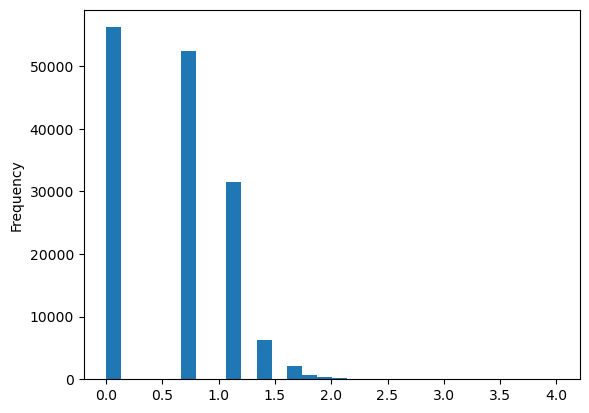

In [76]:
df['log_NumberRealEstateLoansOrLines'] = np.log1p(df['NumberRealEstateLoansOrLines'])
df['log_NumberRealEstateLoansOrLines'].plot(kind = 'hist' , bins = 30 )

In [77]:
upper_cap = df['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.99)
lower_cap = df['NumberOfTime60-89DaysPastDueNotWorse'].quantile(0.01)

df['Rang_NumberOfTime60-89DaysPastDueNotWorse'] = np.where(
    df['NumberOfTime60-89DaysPastDueNotWorse'] > upper_cap, upper_cap,
    np.where(df['NumberOfTime60-89DaysPastDueNotWorse'] < lower_cap, lower_cap,
             df['NumberOfTime60-89DaysPastDueNotWorse'])
)
df['log_Rang_NumberOfTime60-89DaysPastDueNotWorse'] = np.log1p(df['Rang_NumberOfTime60-89DaysPastDueNotWorse'])
df['sqrt_og_Rang_NumberOfTime60-89DaysPastDueNotWorse'] = np.sqrt(df['log_Rang_NumberOfTime60-89DaysPastDueNotWorse'])

In [78]:
df = df.drop(['Rang_NumberOfTime60-89DaysPastDueNotWorse','log_Rang_NumberOfTime60-89DaysPastDueNotWorse'],axis = 1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 23 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         150000 non-null  int64  
 1   SeriousDlqin2yrs                                   150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines               150000 non-null  float64
 3   age                                                150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse               150000 non-null  int64  
 5   DebtRatio                                          150000 non-null  float64
 6   MonthlyIncome                                      150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans                    150000 non-null  int64  
 8   NumberOfTimes90DaysLate                            150000 non-null  int64 

## Feature engineering
#### Transform skewed numeric features → log, sqrt
#### Create ratios → Debt per loan, Debt per dependent
#### Aggregate late payments → total late
#### Binning → Age, Number of loans
#### Interaction features → Income x DebtRatio
#### Drop original redundant columns

In [80]:
# Feature: Debt per Loan
df['Debt_per_Loan'] = df['DebtRatioLT'] / (df['logNo.OfOpenCreditLinesAndLoans'] + 1)

# Feature: Total Late Payments
df['LatePayment_total'] = (
    df['sqrt_Log_Range_NumberOfTimes90DaysLate'] +
    df['logNo.OfTime30-59DaysPastDueNotWorse'] +
    df['sqrt_og_Rang_NumberOfTime60-89DaysPastDueNotWorse']
)

# Feature: Debt per Dependent
df['Debt_per_Dependent'] = df['DebtRatioLT'] / (df['NumberOfDependents'] + 1)

# Feature: Age Group
df['Age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Senior'])

# Feature: Loan Group
df['Loan_group'] = pd.cut(
    df['logNo.OfOpenCreditLinesAndLoans'],
    bins=[0, 3, 7, 50],
    labels=['Low', 'Medium', 'High']
)

# Feature: Income multiplied by Debt Ratio
df['Income_x_DebtRatio'] = df['MonthlyIncome_sqrt'] * df['DebtRatioLT']


## Exploratory data analysis (EDA)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 29 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   Unnamed: 0                                         150000 non-null  int64   
 1   SeriousDlqin2yrs                                   150000 non-null  int64   
 2   RevolvingUtilizationOfUnsecuredLines               150000 non-null  float64 
 3   age                                                150000 non-null  int64   
 4   NumberOfTime30-59DaysPastDueNotWorse               150000 non-null  int64   
 5   DebtRatio                                          150000 non-null  float64 
 6   MonthlyIncome                                      150000 non-null  float64 
 7   NumberOfOpenCreditLinesAndLoans                    150000 non-null  int64   
 8   NumberOfTimes90DaysLate                            150000 non-nu

In [82]:
# List of columns you want to keep
keep_columns = ['Debt_per_Loan','LatePayment_total','Debt_per_Dependent','Age_group','Loan_group','Income_x_DebtRatio']

# Keep only these columns
df = df[keep_columns]


In [83]:
dforg = pd.read_csv('cs-training.csv')
dforg.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [84]:
df['SeriousDlqin2yrs'] = dforg['SeriousDlqin2yrs']


In [85]:
df.describe()

,Debt_per_Loan,LatePayment_total,Debt_per_Dependent,Income_x_DebtRatio,SeriousDlqin2yrs
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.512074,0.245045,1.300963,115.092639,0.066840
std,0.897050,0.619108,2.425074,209.155314,0.249746
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.052513,0.000000,0.081251,10.798173,0.000000
50%,0.095874,0.000000,0.194148,23.413078,0.000000
75%,0.191532,0.000000,0.521821,41.453012,0.000000
max,7.095064,6.911903,8.513193,695.284598,1.000000


In [86]:
df.isnull().sum()

Debt_per_Loan            0
LatePayment_total        0
Debt_per_Dependent       0
Age_group               14
Loan_group            1888
Income_x_DebtRatio       0
SeriousDlqin2yrs         0
dtype: int64

## Haldling missing value in Catagorical column

In [87]:
df.fillna({'Age_group': df['Age_group'].mode()}, inplace=True)
df.fillna({'Loan_group': df['Loan_group'].mode()}, inplace=True)

# Convert catagorical column into Numrical Value

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Age_group'] = le.fit_transform(df['Age_group'])
df['Loan_group'] = le.fit_transform(df['Loan_group'])


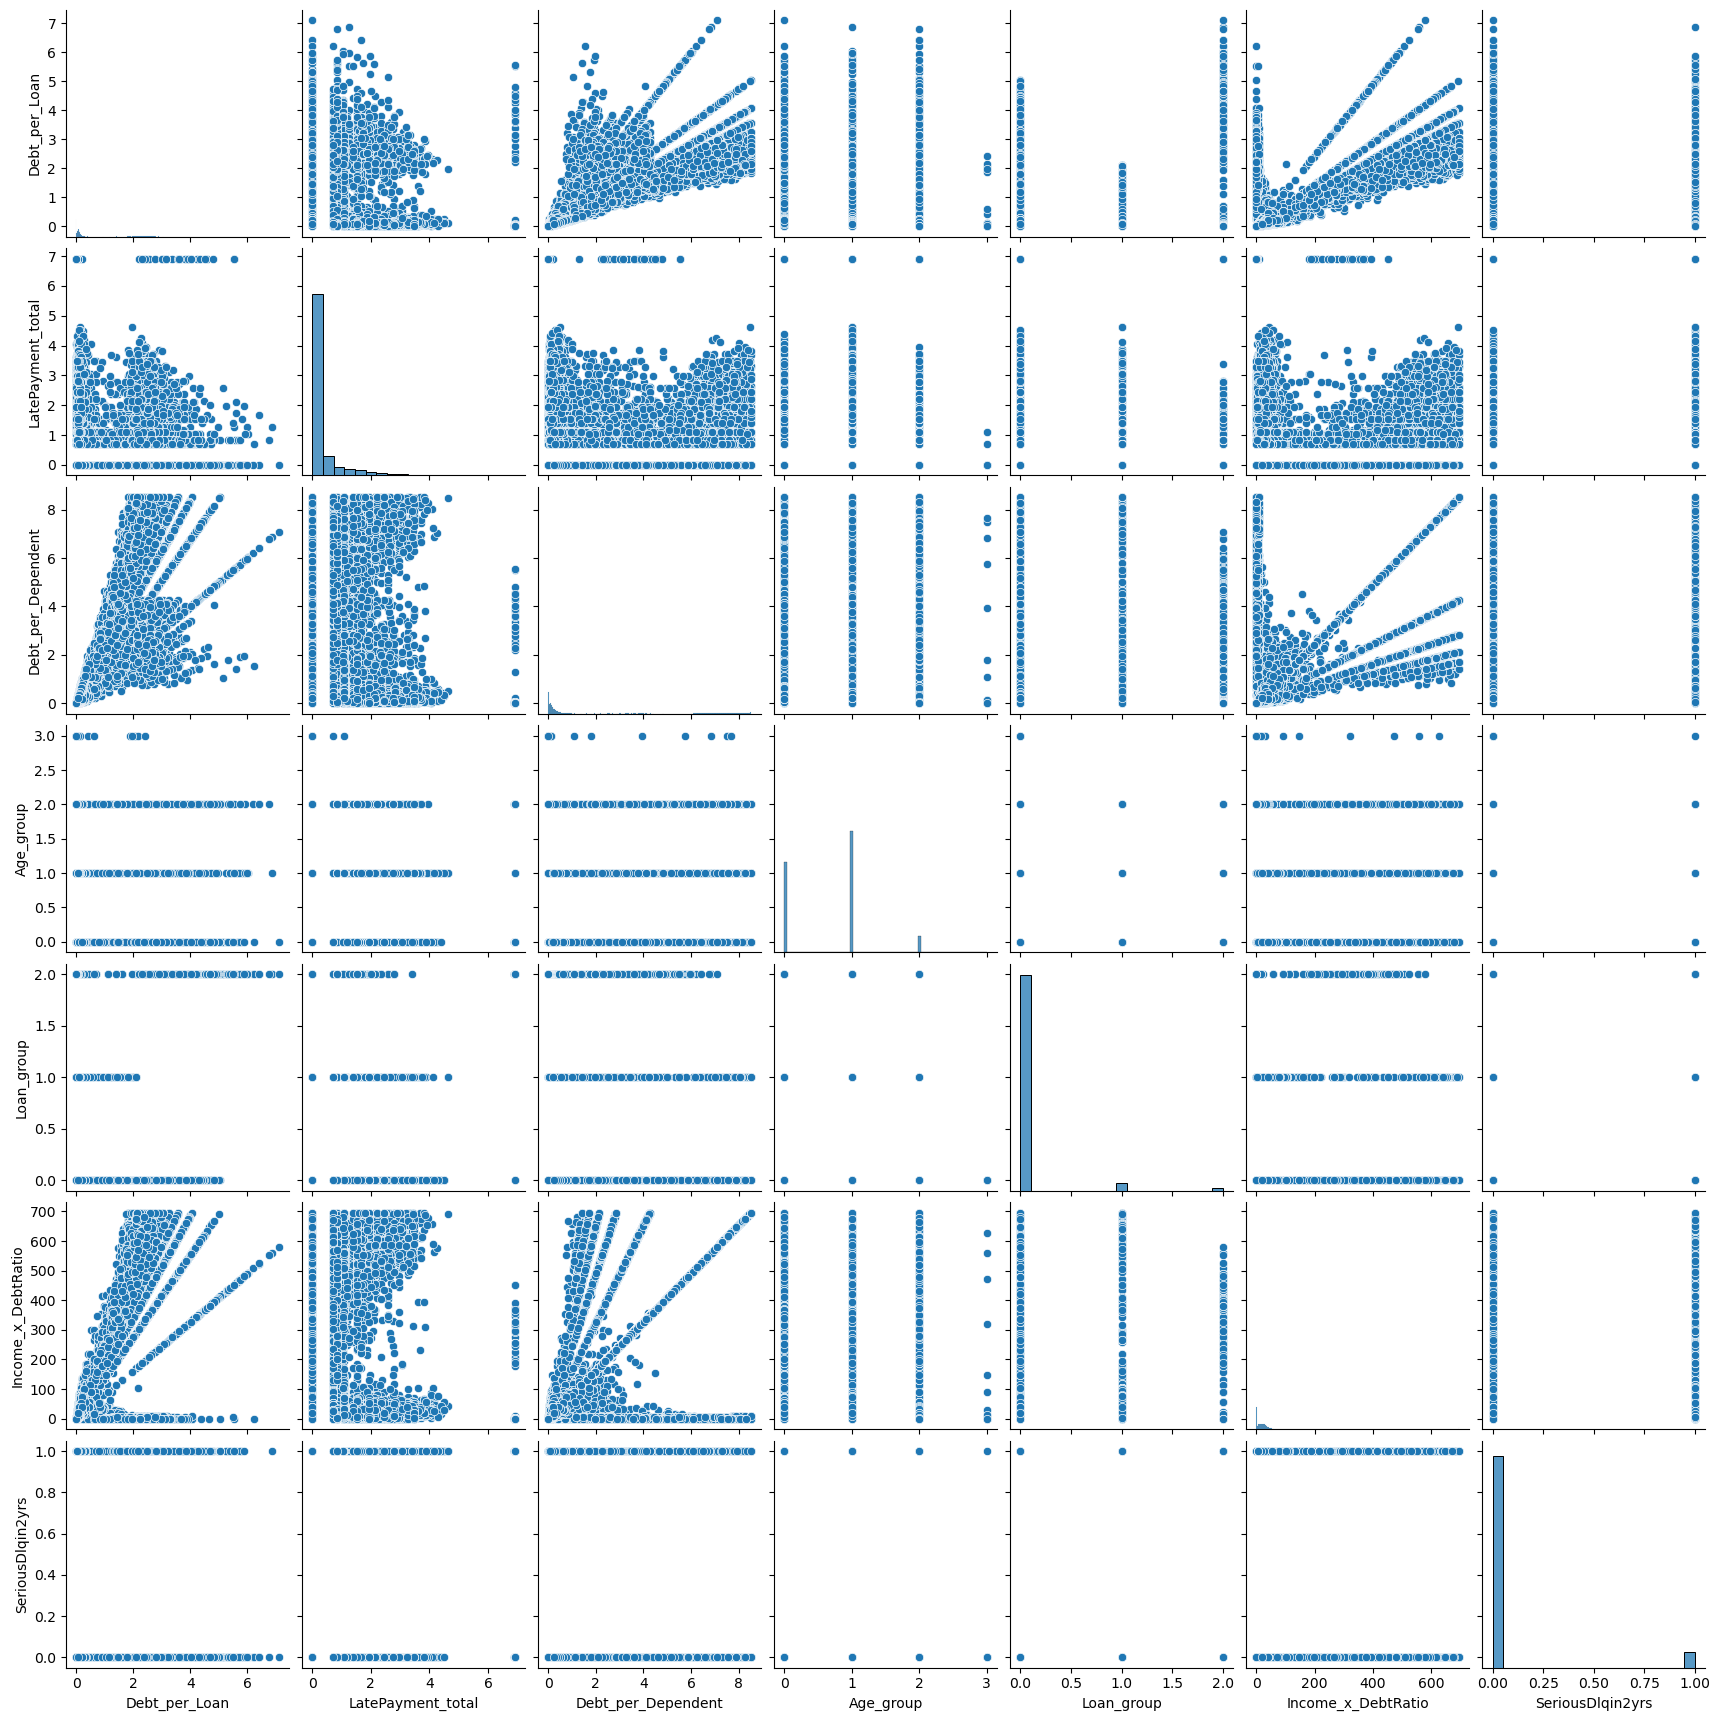

In [89]:
import seaborn as sns
sns.pairplot(df)

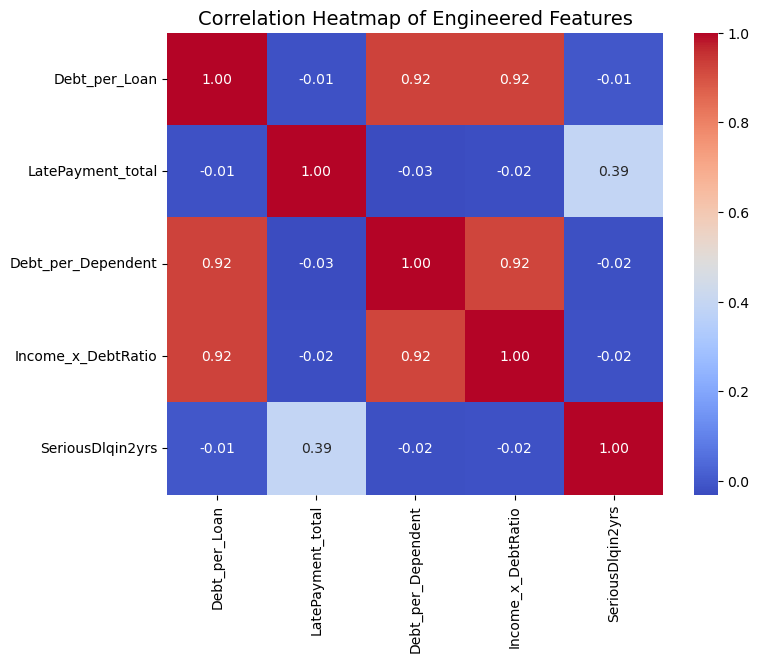

In [90]:
cols = ['Debt_per_Loan', 'LatePayment_total', 'Debt_per_Dependent', 'Income_x_DebtRatio','SeriousDlqin2yrs']
df_corr = df[cols]

# Correlation matrix
corr = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Engineered Features", fontsize=14)
plt.show()

#### Most of the engineered features (like Debt_per_Loan, Debt_per_Dependent, and Income_x_DebtRatio) show weak to moderate correlation with each other, which means they capture different financial aspects of customers and add unique information.

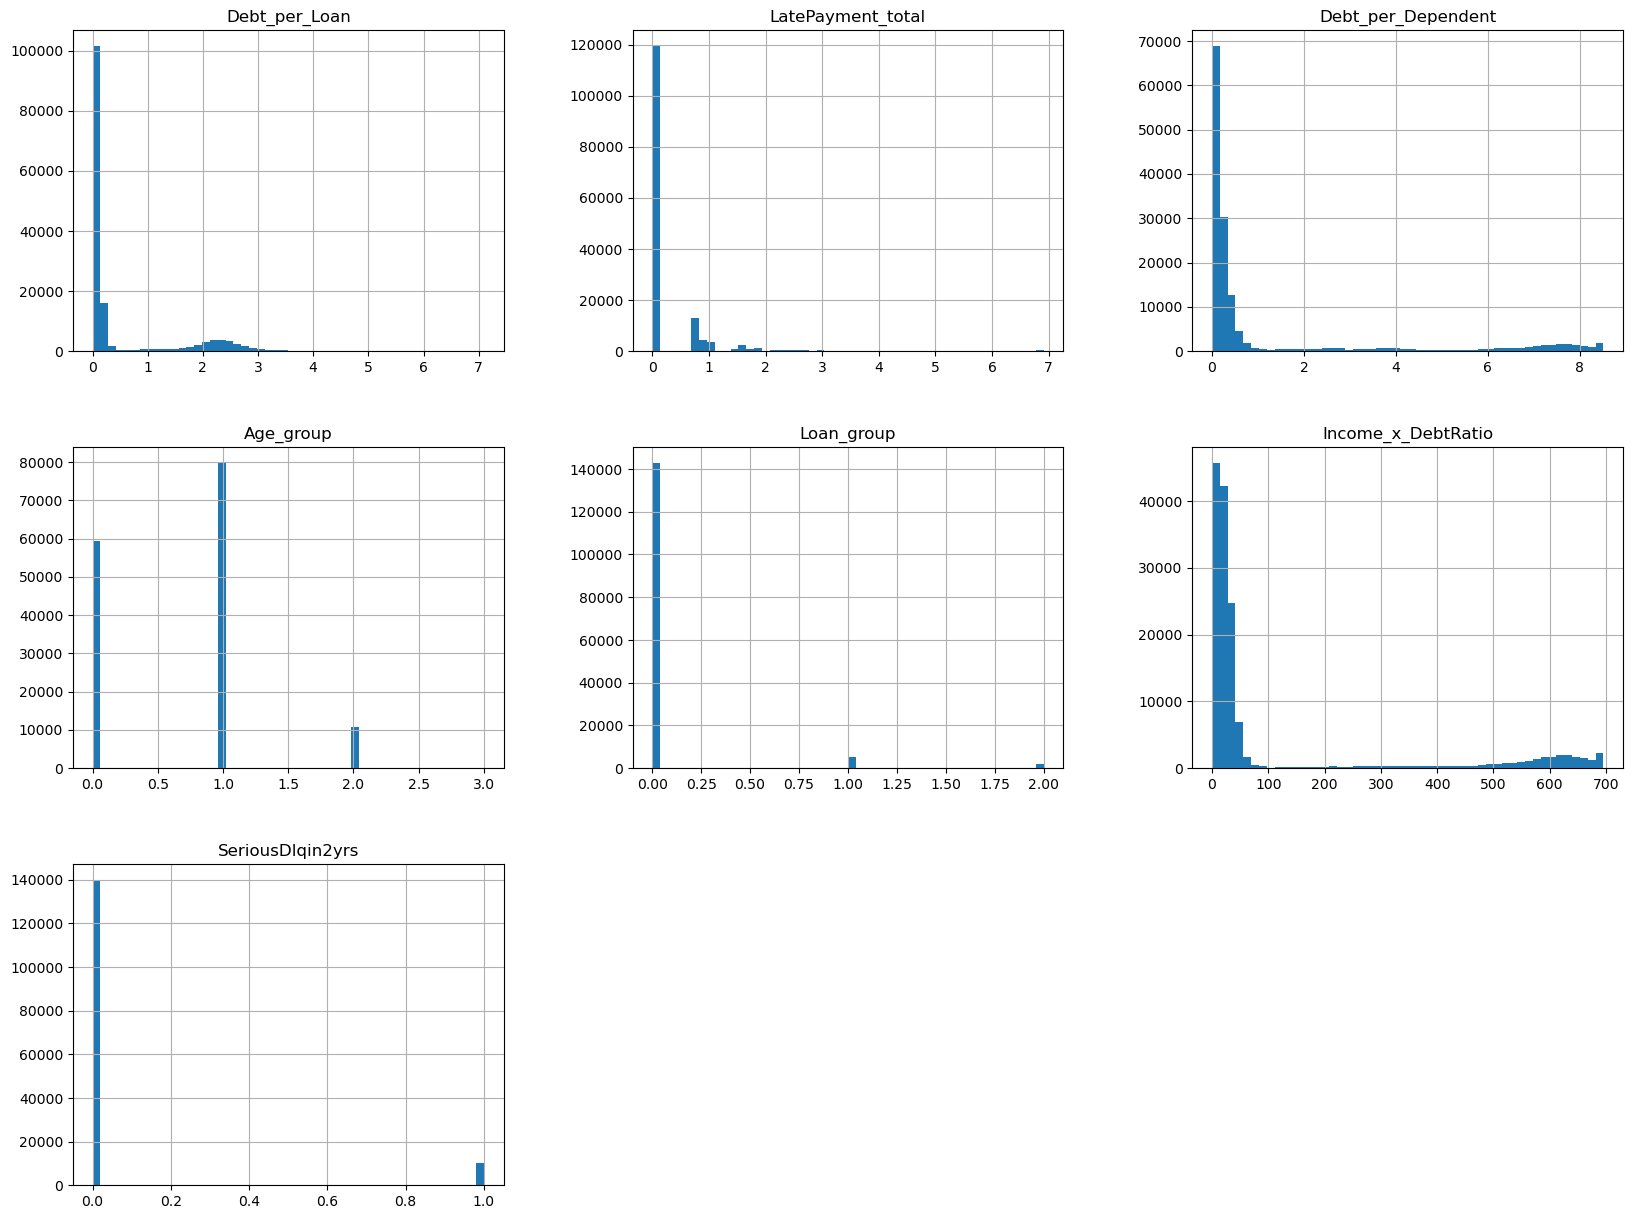

In [91]:
# Distribuion of dataset

df.hist(bins=50,figsize=(20,15))
plt.show()

## Handle Imbalance dataset and Model Training

In [92]:
df['SeriousDlqin2yrs'].value_counts(normalize = True) *100

SeriousDlqin2yrs
0    93.316
1     6.684
Name: proportion, dtype: float64

In [93]:
# identity depended variables and independent variable
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [94]:
X.iloc[:, 0] 

0         0.161977
1         0.044072
2         0.038923
3         0.012686
4         0.007995
            ...   
149995    0.077813
149996    0.207065
149997    2.094409
149998    0.000000
149999    0.069770
Name: Debt_per_Loan, Length: 150000, dtype: float64

<Axes: xlabel='Debt_per_Loan', ylabel='LatePayment_total'>

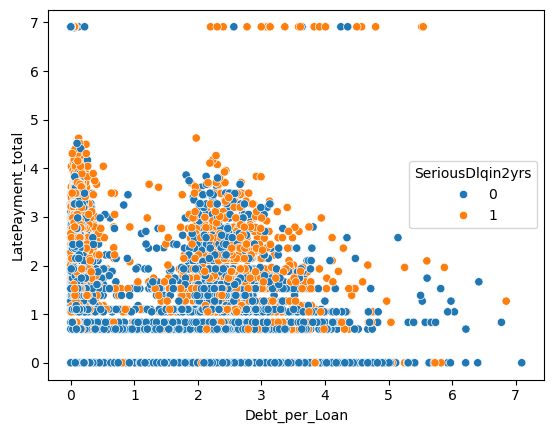

In [95]:
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y)

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 42)

In [97]:
X_train.isnull().sum()

Debt_per_Loan         0
LatePayment_total     0
Debt_per_Dependent    0
Age_group             0
Loan_group            0
Income_x_DebtRatio    0
dtype: int64

### Handle imbalance with SMOTE (oversampling minority class)

In [98]:
# Handle imbalance with SMOTE (oversampling minority class)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res.value_counts(normalize = True) *100

SeriousDlqin2yrs
0    50.0
1    50.0
Name: proportion, dtype: float64

## Feature Scaling Or Standardization

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

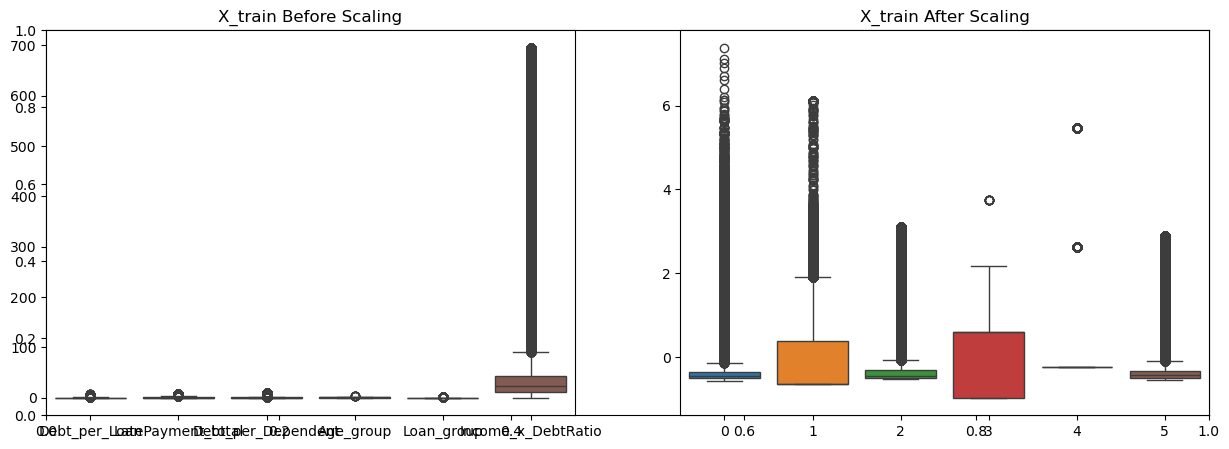

In [100]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train_res)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

In [124]:
# Checking the shape of data
X_train_scaled.shape ,y_train_res.shape,X_test_scaled.shape,X_test.shape,y_pred.shape

((209898, 6), (209898,), (37500, 6), (37500, 6), (37500,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train_res)
y_pred=linreg.predict(X_test_scaled)

In [ ]:
plt.plot(y_test,y_pred)

In [ ]:
print(linreg.coef_)
print(linreg.intercept_)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train_res,y_train_res)
y_pred=logistic.predict(X_test)
print(y_pred)

In [ ]:
plt.plot(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

**Here I got 82% Accuracy in logistic Regression before Hyperparameter Turning** 

## Hyperparameter Turning in Logistic Regression

In [ ]:
logistic=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [ ]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [ ]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=logistic,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

**Here I got 93% Accuracy in logistic Regression After Hyperparameter Turning**

## Decision tree apply of these dataset 

<Axes: >

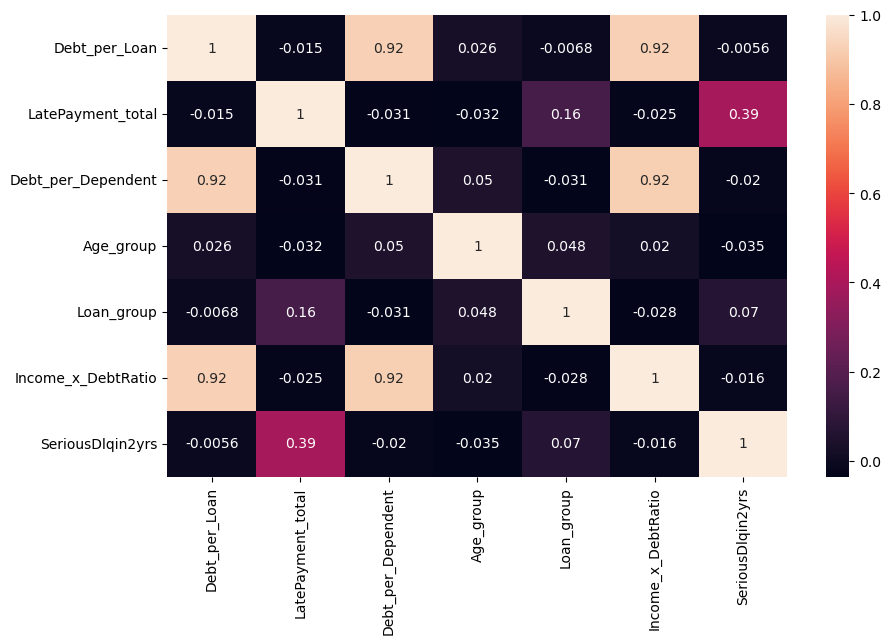

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [105]:
# Independent and dependent variables
X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']

In [ ]:
# split the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.25,random_state=42)

In [106]:
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier()
Classifier.fit(X_train ,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = Classifier.predict(X_test)

In [108]:
# Cheack validation of dataset
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 

In [109]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8983733333333334
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     35025
           1       0.24      0.24      0.24      2475

    accuracy                           0.90     37500
   macro avg       0.59      0.59      0.59     37500
weighted avg       0.90      0.90      0.90     37500

[[33087  1938]
 [ 1873   602]]


## Hyperparameter tunning 

In [110]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid = GridSearchCV(Classifier,param_grid=param,cv=5,scoring='accuracy')

In [113]:
grid.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [114]:
y_pred1 = grid.predict(X_test)

In [115]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [116]:
y_pred1 = grid.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.93712
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     35025
           1       0.62      0.12      0.20      2475

    accuracy                           0.94     37500
   macro avg       0.78      0.56      0.58     37500
weighted avg       0.92      0.94      0.92     37500

[[34848   177]
 [ 2181   294]]


In [118]:
selectionModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features='sqrt',splitter='random')

In [120]:
selectionModel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       splitter='random')

In [121]:
final_prediction = selectionModel.predict(X_test)

In [123]:
print(accuracy_score(y_test,final_prediction))
print(classification_report(y_test,final_prediction))
print(confusion_matrix(y_test,final_prediction))

0.9338666666666666
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     35025
           1       0.46      0.01      0.02      2475

    accuracy                           0.93     37500
   macro avg       0.70      0.51      0.50     37500
weighted avg       0.90      0.93      0.90     37500

[[34989    36]
 [ 2444    31]]


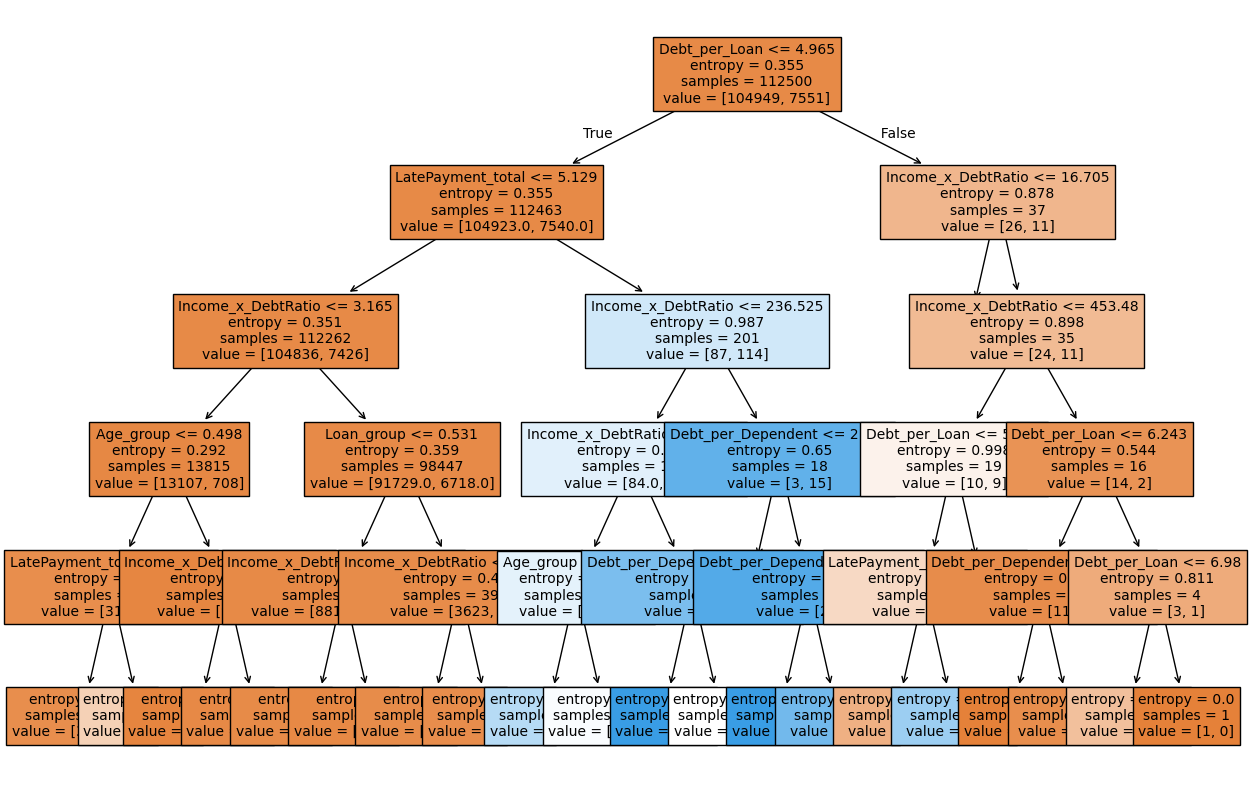

In [122]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(selectionModel, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

### Conclusion:
This project aimed to predict credit default risk (SeriousDlqin2yrs) using two models: Logistic Regression and Decision Tree Classifier. Initially, Logistic Regression achieved 82% accuracy, and Decision Tree achieved 89% accuracy. After applying hyperparameter tuning, the accuracy of both models improved significantly to 93%.

##### The results highlight that:
1. Hyperparameter tuning substantially improves model performance.
2. Logistic Regression, as a linear model, provided a strong baseline
3. Decision Tree, as a non-linear model, captured complex relationships and achieved comparable results    after tuning.
4. Both models can be valuable tools for credit risk analysis and support data-driven decision-making      in financial domains.

#####  Overall, the project demonstrates the effectiveness of machine learning in risk prediction and emphasizes the importance of data preprocessing, feature engineering, and model optimization.